# Setting all Dependencies and Path

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/DSCNITP/Loan Prediction

/content/drive/MyDrive/DSCNITP/Loan Prediction


# Importing all required Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Loading Dataset

In [5]:
data=pd.read_csv('loan_data.csv')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preparation

## Dropping Unwanted Columns

In [7]:
data.drop(['Loan_ID'],axis=1,inplace=True)

## Dropping Null Value Rows

In [8]:
data.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [9]:
data.shape

(614, 12)

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(480, 12)

## Encoding the Labels which have string categories 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
le.classes_

array(['Female', 'Male'], dtype=object)

In [14]:
le=LabelEncoder()
data['Married']=le.fit_transform(data['Married'])
le.classes_

array(['No', 'Yes'], dtype=object)

In [15]:
le=LabelEncoder()
data['Education']=le.fit_transform(data['Education'])
le.classes_

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
le=LabelEncoder()
data['Self_Employed']=le.fit_transform(data['Self_Employed'])
le.classes_

array(['No', 'Yes'], dtype=object)

In [17]:
le=LabelEncoder()
data['Property_Area']=le.fit_transform(data['Property_Area'])
le.classes_

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [18]:
le=LabelEncoder()
data['Dependents']=le.fit_transform(data['Dependents'])
le.classes_

array(['0', '1', '2', '3+'], dtype=object)

In [19]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,Y
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,Y
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,Y


## Dividing the Data into features and Labels

In [20]:
features=data.iloc[:,:-1]

In [21]:
features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


In [22]:
labels=data.iloc[:,-1]

In [23]:
labels

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

## Splitting the features and labels to train and test sets

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=7)

# Model

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
DC = DecisionTreeClassifier()

In [29]:
DC

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
params={
    'criterion':["gini", "entropy"],
    'max_depth':np.arange(3,10),
    'splitter':["best","random"]
}

In [31]:
cv=GridSearchCV(DC,param_grid=params)

In [33]:
cv.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [34]:
model=cv.best_estimator_

In [35]:
cv.best_score_

0.8176691729323309

In [36]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}

# Plot Decision Tree

In [43]:
import matplotlib.pyplot as plt
import sklearn as sk

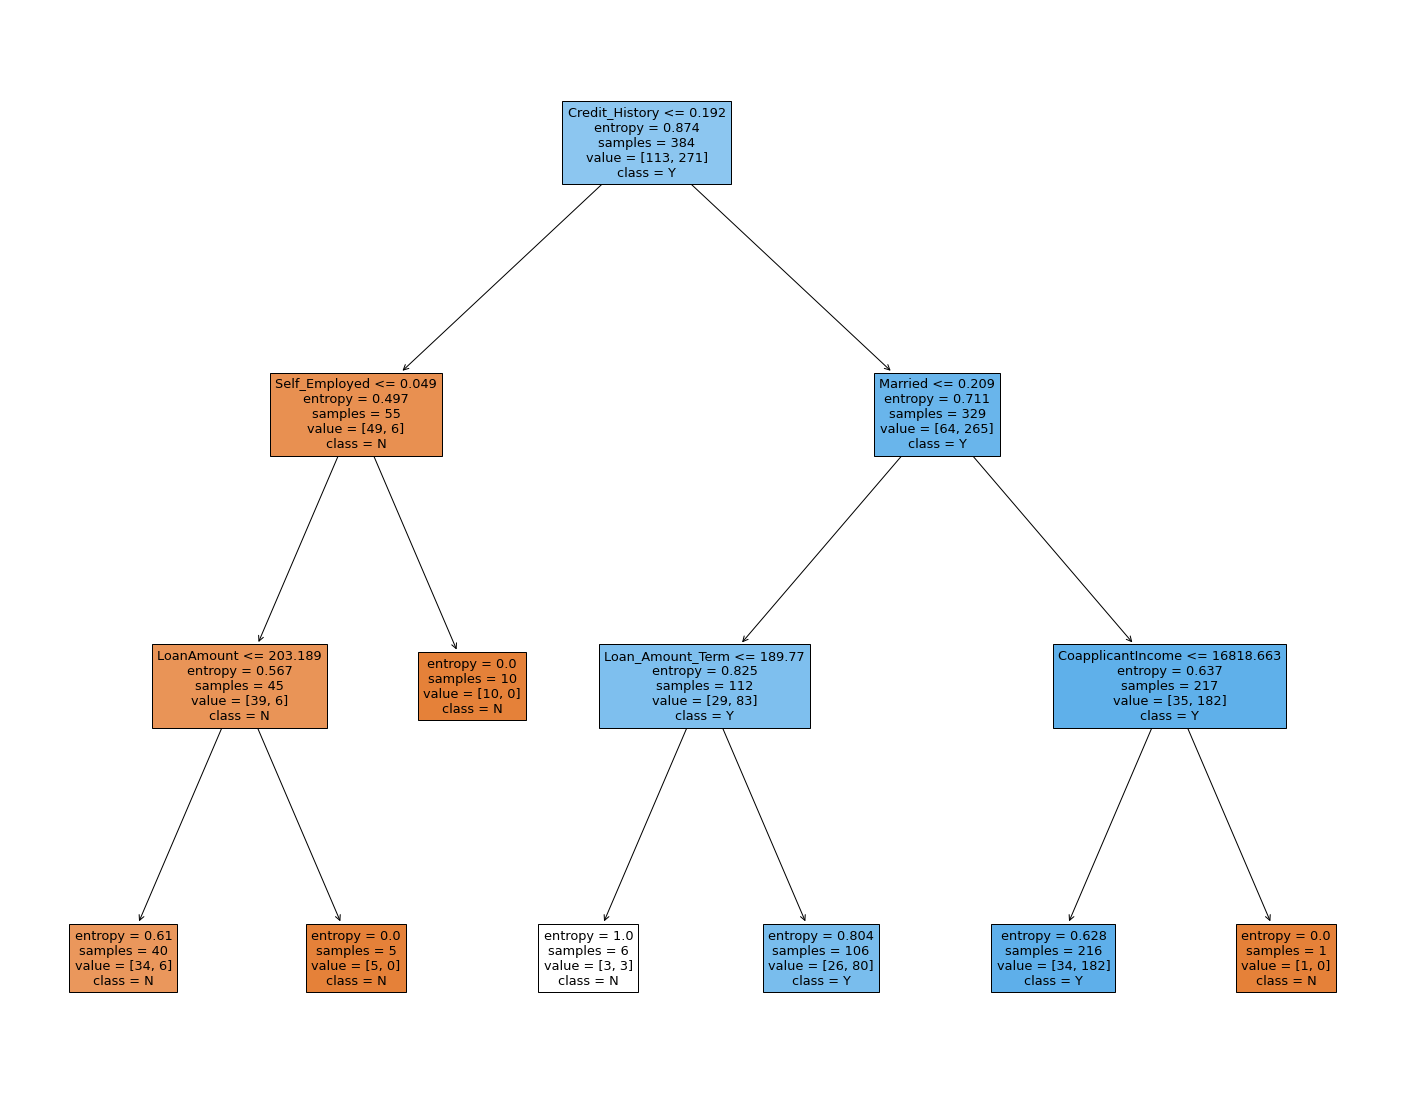

In [45]:
fig = plt.figure(figsize=(25,20))
_ = sk.tree.plot_tree(model, 
                   feature_names=features.columns,  
                   class_names=['N','Y'],
                   filled=True)


# Prediction with Test Data

In [46]:
label_pred = model.predict(feature_test)

In [47]:
label_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y'], dtype=object)

# Metrics

## Accuracy

In [48]:
accuracy_score(label_test,label_pred)

0.7604166666666666

## Confusion_Matrix

In [49]:
confusion_matrix(label_test,label_pred)

array([[14, 21],
       [ 2, 59]])

## Classification Report

In [50]:
print(classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           N       0.88      0.40      0.55        35
           Y       0.74      0.97      0.84        61

    accuracy                           0.76        96
   macro avg       0.81      0.68      0.69        96
weighted avg       0.79      0.76      0.73        96



# Saving the model

In [51]:
import pickle

In [52]:
pickle.dump(model,open("model_DecisionTree.pkl","wb+"),protocol=pickle.HIGHEST_PROTOCOL)

# Loading the model

In [53]:
model_pickle=pickle.load(open('model_DecisionTree.pkl','rb+'))

In [54]:
model_pickle

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')